In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("IMDb Movies India.csv.zip",  encoding="ISO-8859-1")

In [6]:
# Clean data
df.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
df.dropna(subset=['Year'], inplace=True)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

In [7]:
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 14981 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      14981 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7115 non-null   object 
 3   Genre     13140 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     6548 non-null   float64
 6   Director  14484 non-null  object 
 7   Actor 1   13493 non-null  object 
 8   Actor 2   12784 non-null  object 
 9   Actor 3   12074 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.3+ MB
None

First 5 rows:
                                 Name    Year Duration  \
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
2                         #Homecoming  (2021)   90 min   
3                             #Yaaram  (2019)  110 min   
4                   ...And Once Again  (2010)  105 min   
5                ...Aur Pyaar Ho Gaya  (1997)  147 m

In [8]:
# Best rated year
best_rated_year = df.groupby('Year')['Rating'].mean().idxmax()
print(f"\nYear with best average rating: {best_rated_year}")


Year with best average rating: (1948)


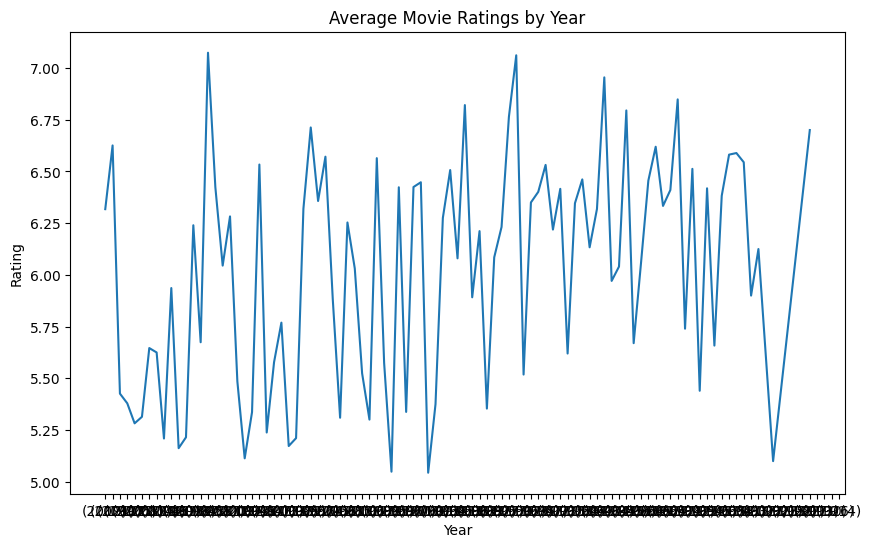

In [9]:
# Average rating trend
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Rating', errorbar=None)
plt.title('Average Movie Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

In [10]:
# Top 10 movies by rating
top_10_movies = df.nlargest(10, 'Rating')[['Rating', 'Year']]
print("\nTop 10 Movies by Rating:")
print(top_10_movies)


Top 10 Movies by Rating:
       Rating    Year
8339     10.0  (2020)
5410      9.7  (2021)
2563      9.6  (2020)
5077      9.4  (2019)
6852      9.4  (2021)
11704     9.4  (2017)
14222     9.4  (2020)
1314      9.3  (2018)
1729      9.3  (2021)
5125      9.3  (2019)


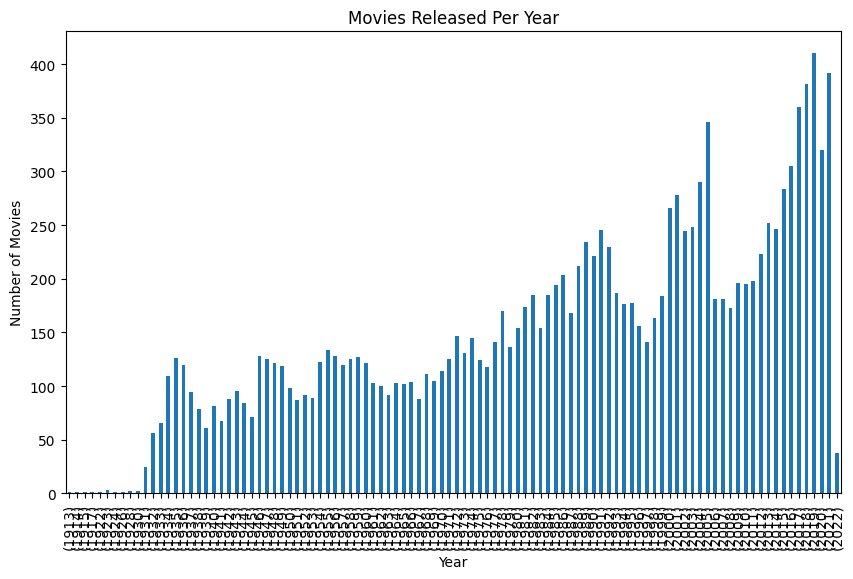

In [11]:
# Movies released per year
plt.figure(figsize=(10,6))
df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

In [13]:
# Top 10 movies by votes
top_votes = df.nlargest(10, 'Votes')[['Votes', 'Rating']]
print("\nMovies with Most Votes:")
print(top_votes)


Movies with Most Votes:
       Votes  Rating
12569  999.0     7.1
5663   998.0     6.8
7930   996.0     6.0
3961   986.0     5.2
6241   985.0     7.4
7083   985.0     8.1
9822   984.0     7.5
12     983.0     6.5
2612   982.0     6.0
2453   981.0     5.0



Top 10 Directors by Number of Movies:
Director
Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
Nanabhai Bhatt      46
Dhirubhai Desai     46
Mohammed Hussain    44
B.R. Ishara         44
David Dhawan        43
Name: count, dtype: int64


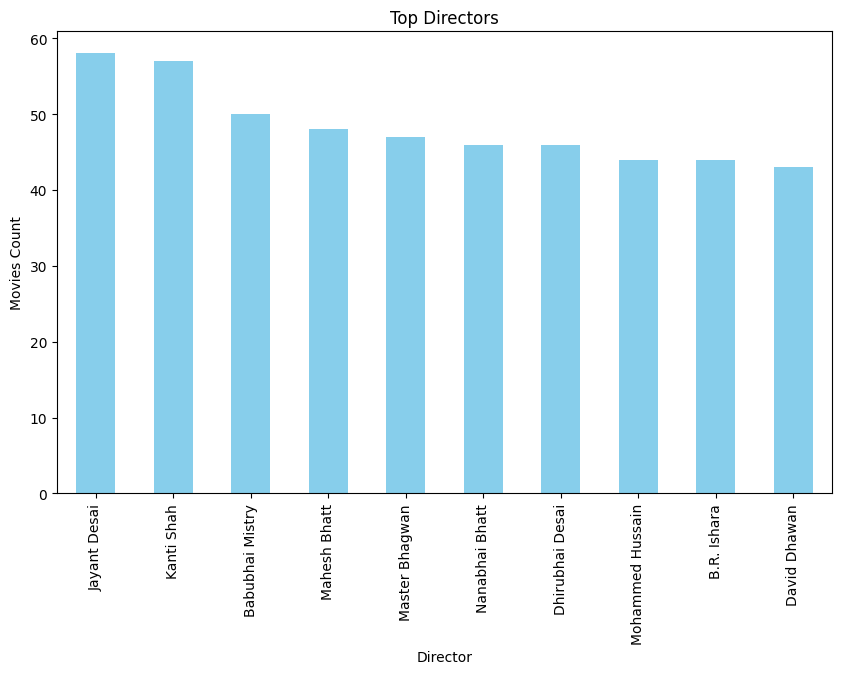

In [14]:
# Top directors
top_directors = df['Director'].value_counts().head(10)
print("\nTop 10 Directors by Number of Movies:")
print(top_directors)
top_directors.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Top Directors')
plt.xlabel('Director')
plt.ylabel('Movies Count')
plt.show()


Top 10 Actors by Appearances:
Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      127
Rajesh Khanna         122
Dev Anand              93
Shashi Kapoor          91
Akshay Kumar           86
Sanjeev Kumar          83
Name: count, dtype: int64


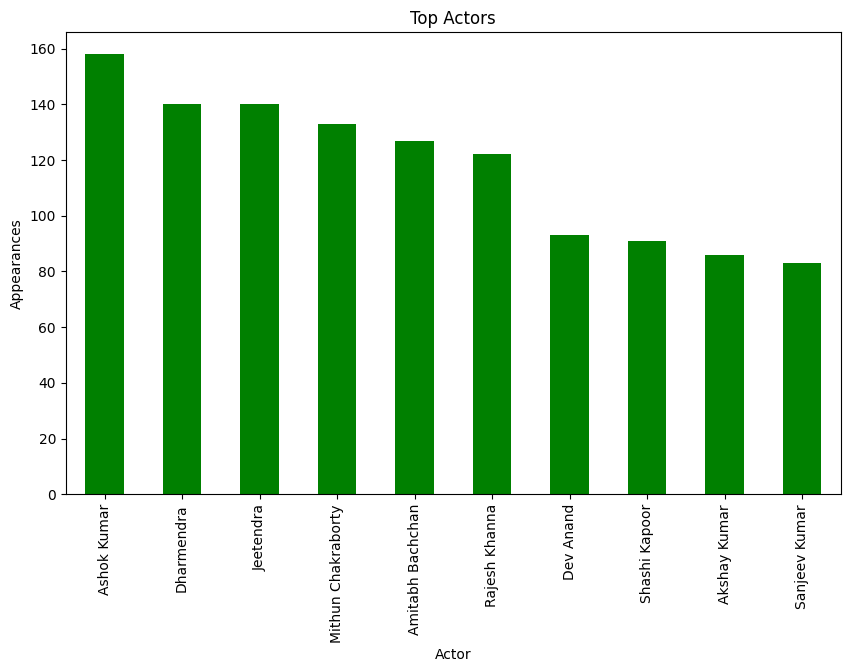

In [15]:

# Top actors
top_actors = df['Actor 1'].str.split(',', expand=True).stack().value_counts().head(10)
print("\nTop 10 Actors by Appearances:")
print(top_actors)
top_actors.plot(kind='bar', figsize=(10,6), color='green')
plt.title('Top Actors')
plt.xlabel('Actor')
plt.ylabel('Appearances')
plt.show()